# MVP Análise de Dados e Boas Práticas

**Nome:** Everson Viana Tavares

**Matrícula:** 40530010055_20250_01

**Dataset:** [Brazilian Election Fake News 2018](https://www.kaggle.com/datasets/caiovms/brazilian-election-fake-news-2018/data)



# Descrição do Problema

Parte da gastronomia da Geração Z, o abacate é ingrediente base das famosas avocado toast. Nesse MVP, vamos analisar as vendas de abacate tipo Hass, popularmente conhecido no Brasil como avocado, para entender padrões de vendas, diferenças de preços entre tipos, regiões e impactos da sazonalidade nos preços. No conjunto de dados Avocado Prices, encontramos dados do website Hass Avocado Board até maio de 2018 compilados em tabela. Os dados vem diretamente das caixas registradoras dos varejistas estadunidenses e leva em consideração os abacates vendidos. Total Volume e Average Price refletem, respectivamente, o total de vendas de abacates Hass o preço médio do abacate. O código Product Lookup (PLU) na tabela é apenas para os abacates tipo HASS, ou seja, os avocados -- outras variedades de abacates não estão incluídas nessa tabela.

Entre as tabelas relevantes nesse conjunto de dados estão date, que se refere a data da observação; AveragePrice, o preço médio de um único abacate; type, se é convencional ou orgânico; year, ano de registro; Region, a cidade ou região da observação; Total Volume, o número total de abacates vendidos.



## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- O preço médio do abacate tipo Hass varia ao longo do ano, apresentando sazonalidade.

- Abacates orgânicos são mais caros do que os convêncionais.

- Os preços médios variam por região.


## Tipo de Problema

Este é um problema de **análise exploratória de dados**. O objetivo é descrever padrões e comportamentos de preços de abacates nos Estados Unidos. Embora o estudo de padrões sazonais e diferenças regionais possa ser descritivo, tais analises podem embasar um futuro modelo de regressão para previsão de preços médios.

## Seleção de Dados

O dataset Avocado Prices é um conjunto de dados abertos disponível no repositório Kaggle. A alta usabilidade deste dataset dispensa a etapa de seleção de dados. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso, verificaremos apenas a presença de valores faltantes ou inconsistentes.

## Atributos do Dataset

O dataset Avocado.csv contém 52 amostras por data de coleta entre os dias 03 de janeiro de 2015 até 24 de março de 2018 com 52 amostras sobre:

- ***index*** (número de cada entrada)
- ***Date*** (A data da observação)
- ***AveragePrice*** (o preço médio de um único avocado)
- ***Total Volume*** (Número total de avocados vendidos)
- ***4046*** (Número total de avocados com PLU 4046 vendidos)
- ***4225*** (Número total de avocados com PLU 4225 vendidos)
- ***4770*** (Número total de avocados com PLU 4770 vendidos)
- ***Total Bags***
- ***Small Bags***
- ***Large Bags***
- ***XLarge Bags***

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [144]:
# Importação das bibliotcas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Configurações gerais
display.max_columns = None
sns.set(style='whitegrid')

In [145]:
# Carregamento dos dados (do GitHub)
dataset_url = 'https://raw.githubusercontent.com/eversontavares/PUCdatascience/main/avocado.csv'
df = pd.read_csv(dataset_url)
df['Date'] = pd.to_datetime(df['Date'])

# Verificação inicial
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB
None
     

**Sem nulos**

O dataframe revela que não há entradas nulas. Desse modo, dispensa-se a limpeza de dados inconsistentes ou o preenchimento de valores faltantes.

**Dados numéricos e genéricos**

As informações do dataset mostram dois tipos de dados, os numéricos e os genéricos. Os campos relacionados ao preço, à quantidade e ao ano foram corretamente identificados como numéricos; já os campos de região, tipo e data foram identificados como genéricos. Uma vez que as entradas de data registradas na coluna "Date" deveriam ser interpretadas como numéricas, pode haver a necessidade de conversão dessas entradas na etapa de análise exploratória de dados.

Outra coluna que disperta curiosidade é a Unnamed. A hipótese inicial é que se refira à coluna index do dataset. Verificaremos nas primeiras linhas do dataframe.

In [146]:
# primeiras linhas
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Unnamed**

Como pode ser observado nas primeiras cinco linhas do dataset, a coluna Unnamed refere-se a um index numérico que pode ser descartado.
Para fazê-lo, vamos criar um filtro apenas com as colunas necessárias.

In [147]:
# Remover coluna 'Unnamed'
df = df.drop(columns=['Unnamed: 0'])

**Verificação da nova estrutura**

Após retirar a coluna Unnamed, vamos apresentar novamente as primeiras cinco linhas do dataset para checar o resultado do tratamento.

In [148]:
# Dataset sem a coluna 'Unnamed'
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Avocados.csv, visamos entender padrões e comportamento de preços de abacates nos Estados Unidos, levando em consideração possíveis sazonalidades e variações regionais.

## Total e Tipo das Instâncias

O dataset avocado.csv possui 18249 instâncias (observações), divididos em 14 atributos. A característica preço médio 'Average Price' é numérica (float64), assim como as oito características quantitativas. Já os atributos 'year' e 'Date' são temporais, pois revelam o ano e a data da observação, enquanto os atributos 'type' e 'region' são categóricos.

In [149]:
# Total e tipos de instâncias
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 18249

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB
None


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [150]:
# estatísticas descritivas básicas do dataset
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


### Tipo, preços e evolução temporal ###

Vamos plotar um gráfico boxplot que mostre a distribuição de preços por tipo 'type' dos avocados. Em seguida, comparar com a evolução temporal por tipo e o preço por região.

/tmp/ipython-input-151-2844752366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])


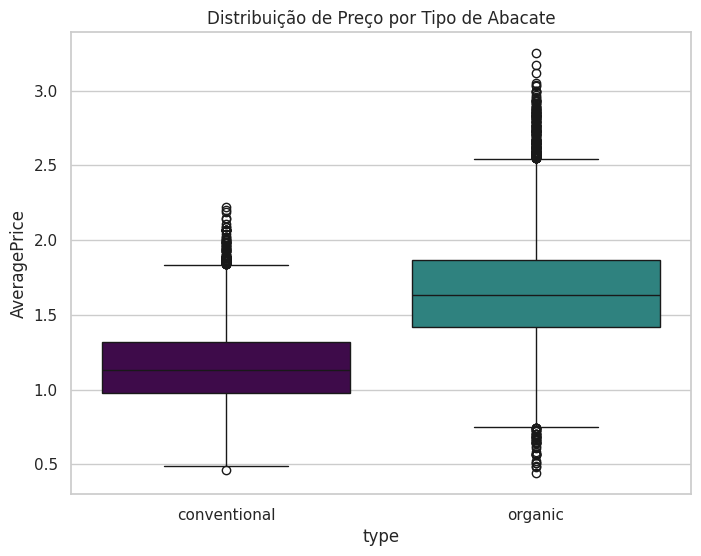

In [151]:
# Boxplot preço por tipo
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])
plt.title('Distribuição de Preço por Tipo de Abacate')
plt.show()

**Conclusão**

O diagrama de caixa mostra a mediana, quartis e outliers do preço dos dois tipos de abacates, convencional e orgânico. Pode-se observar a disparidade de preços, expecialmente o pico de outliers dos avocados convencionais que não chegam a atingir o preço mais alto do terceiro quartil dos orgânicos. Portanto, concluimos que os abacates orgânicos apresentam preços medianos mais altos e maior dispersão.

###Evolução temporal###

O preço médio vária ao longo do tempo por tipo? No gráfico de linha podemos observar essa correlação.

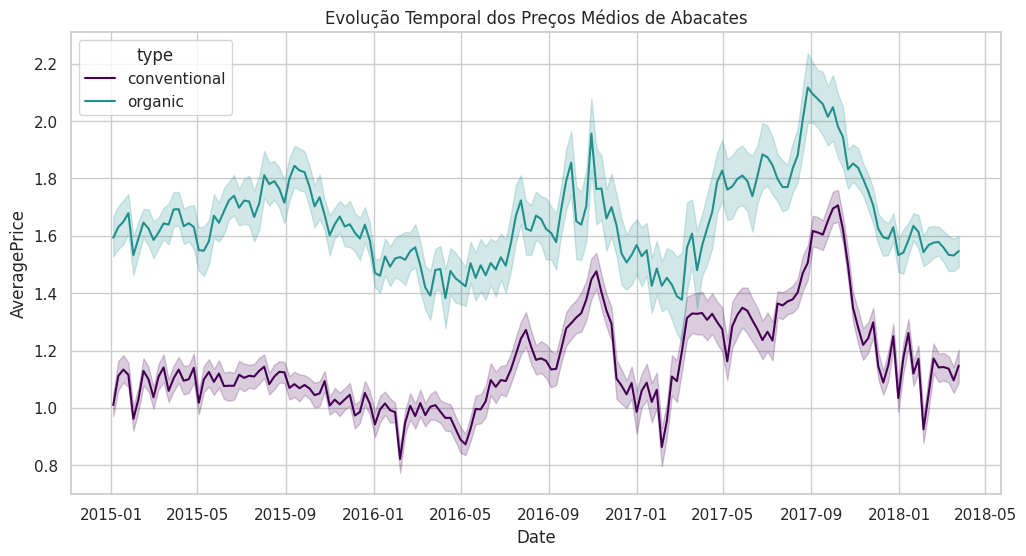

In [152]:
## Evolução temporal do preço médio por tipo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df, palette=['#440154', '#21908C'])
plt.title('Evolução Temporal dos Preços Médios de Abacates')
plt.show()

***Conclusão da análise temporal de preços médios por região***

Como vimos no gráfico acima, a sazonalidade afetou o preço de ambos os tipos de abacates. Ao longo do tempo, pode-se inferir uma correlação -- o que nos traz a ideia de criar adiante uma matriz. Nesse momento, vamos focar em entender o impacto das regiões com um boxplot de preços médios por região agrupados por mediana para facilitar a interpretação.

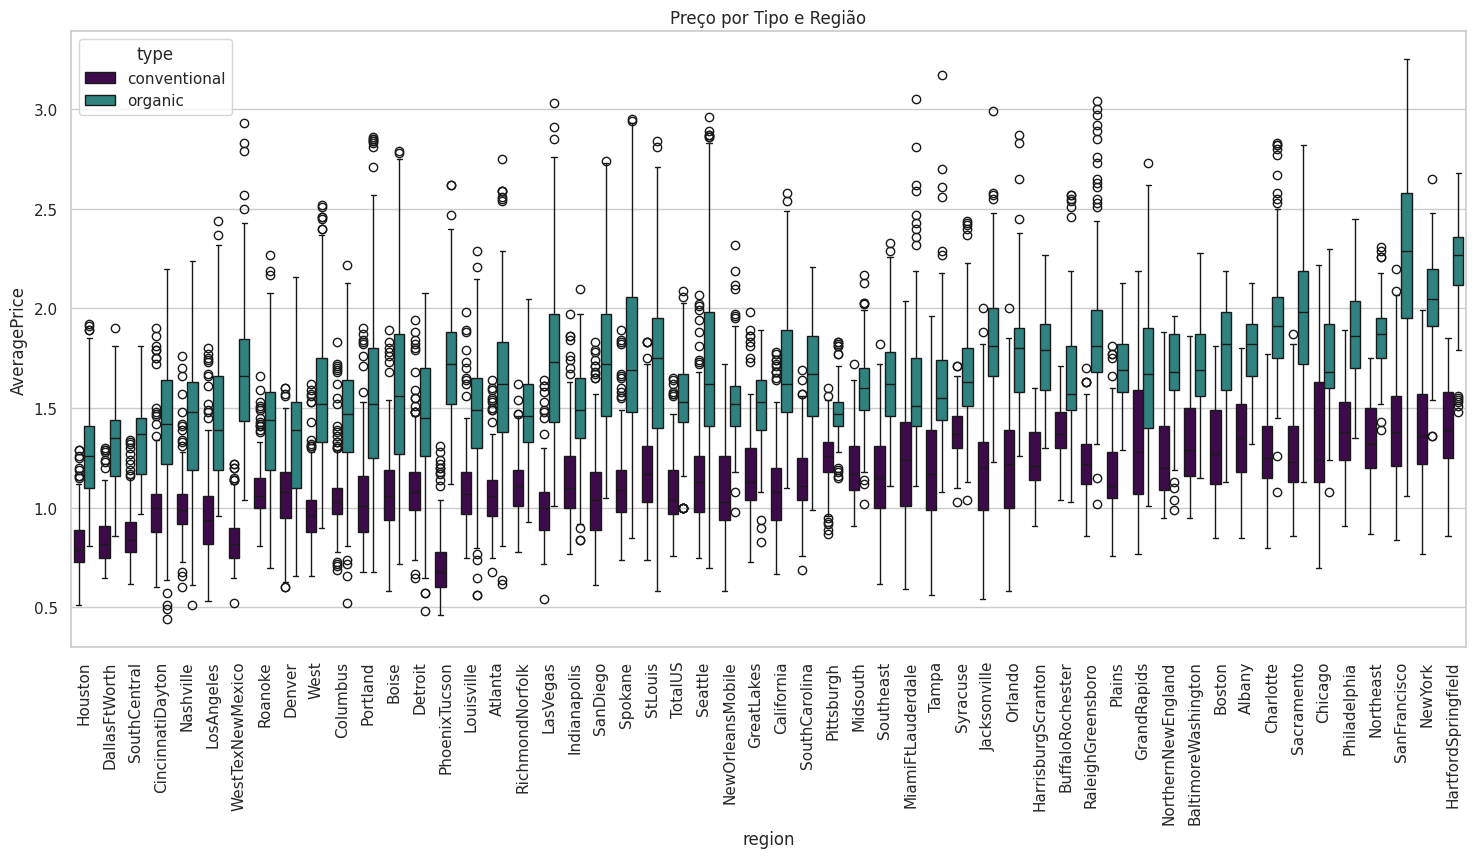

In [153]:
## Agrupamento de regiões
region_order = df.groupby('region')['AveragePrice'].median().sort_values().index

## Boxplot preço por região
plt.figure(figsize=(18, 8))
sns.boxplot(x='region', y='AveragePrice', hue='type', data=df, order=region_order, palette=['#440154', '#21908C'])
plt.xticks(rotation=90)
plt.title('Preço por Tipo e Região')
plt.show()

Os gráficos mostram as regiões com os abacates convencionais e orgânicos com medianas de preços mais acessíveis, como Houson, DallasFtWorth e SouthCentral, além do oposto: preços altos em SanFrancisco, NewYork e HartfordSpringfiel -- indicando mercados premium.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [154]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Date,2016-08-13 23:30:43.498273792
AveragePrice,1.405978
Total Volume,850644.013009
4046,293008.424531
4225,295154.568356
4770,22839.735993
Total Bags,239639.20206
Small Bags,182194.686696
Large Bags,54338.088145
XLarge Bags,3106.426507


***A Média por tipo e por região***

Uma vez que já observamos a variação temporal do preço médio, agora podemos analisar dois aspectos: por tipo e por região. O tipo afeta o preço, mas quanto a média dos preços muda? O gráfico abaixo "Média do Preço por tipo de Abacate"

/tmp/ipython-input-155-2981618462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])


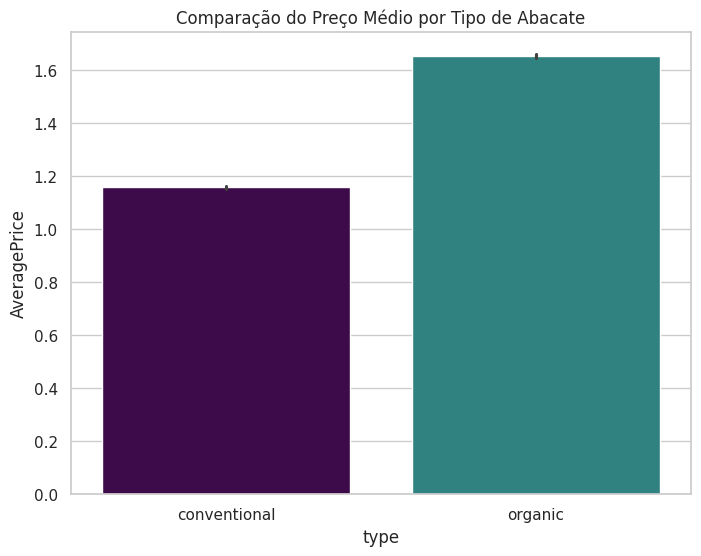

In [155]:
# Gráfico barra de preço médio por tipos
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])
plt.title('Comparação do Preço Médio por Tipo de Abacate')
plt.show()

/tmp/ipython-input-156-2061133204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])


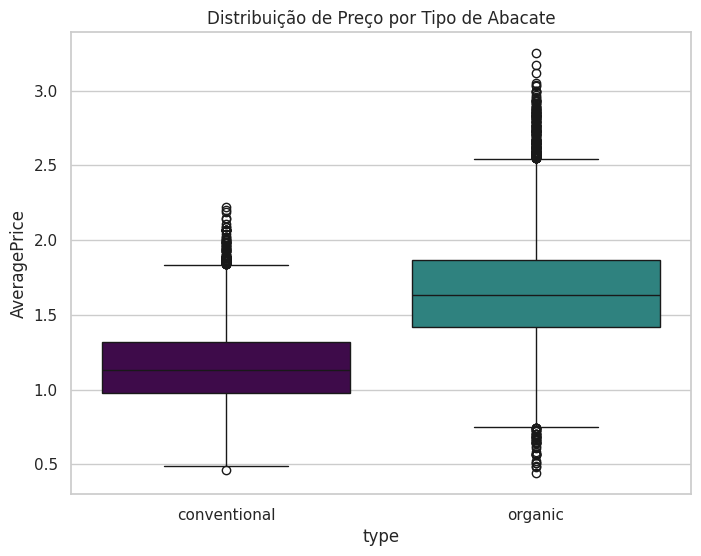

In [156]:
# Boxplot com tipos por preço médio
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='AveragePrice', data=df, palette=['#440154', '#21908C'])
plt.title('Distribuição de Preço por Tipo de Abacate')
plt.show()

**Disposição de pagar**

O ticket médio do abacate orgânico impactou no preço médio total, relevando a disposição do consumidor em pagar mais caro pelo tipo de produto. Uma tendência do mercado pode ser a preferência por consumir produtos mais saudável?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [157]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Date,NaN
AveragePrice,0.402677
Total Volume,3453545.355399
4046,1264989.081763
4225,1204120.401135
4770,107464.068435
Total Bags,986242.399216
Small Bags,746178.514962
Large Bags,243965.964547
XLarge Bags,17692.894652


###Desvio Padrão por Perço###

Usaremos o barplot para mostrar a média e o desvio padrão por tipo de abacate. Assim, podemos visualizar as duas medidas.

/tmp/ipython-input-158-2575541811.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=df, ci='sd', palette=['#440154', '#21908C'])
/tmp/ipython-input-158-2575541811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=df, ci='sd', palette=['#440154', '#21908C'])


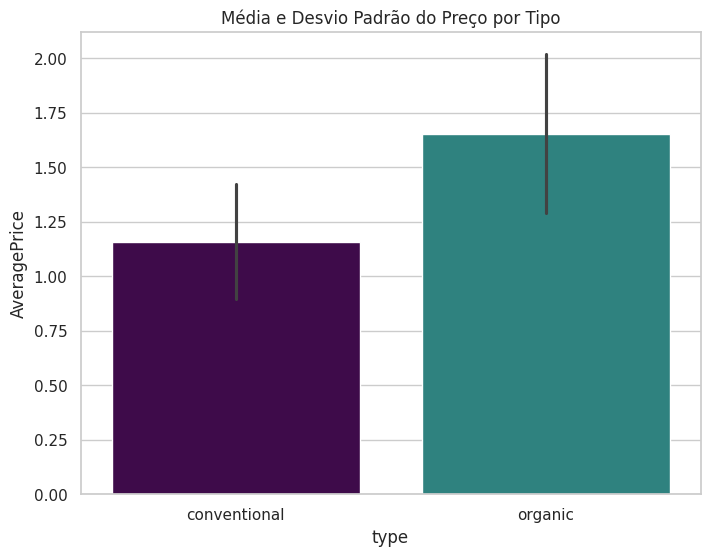

In [158]:
plt.figure(figsize=(8,6))
sns.barplot(x='type', y='AveragePrice', data=df, ci='sd', palette=['#440154', '#21908C'])
plt.title('Média e Desvio Padrão do Preço por Tipo')
plt.show()

Podemos observar a similar variação no desvio padrão, pode ser dizer que há momentos onde pico do desvio padrão do preço do abacate convencional encontra a mínima do desvio padrão do preço do orgânico. Entretanto, a média do orgânico é mais alta.

Mas como serão as médias e o desvio padrão por região?

***Desvio Padrão do Preço por Região***

Criamos um grupo no dataframe para calcular o desvio padrão por região. Afim de comparação, visualizamos também o desvio padrã destacamos essa coluna.

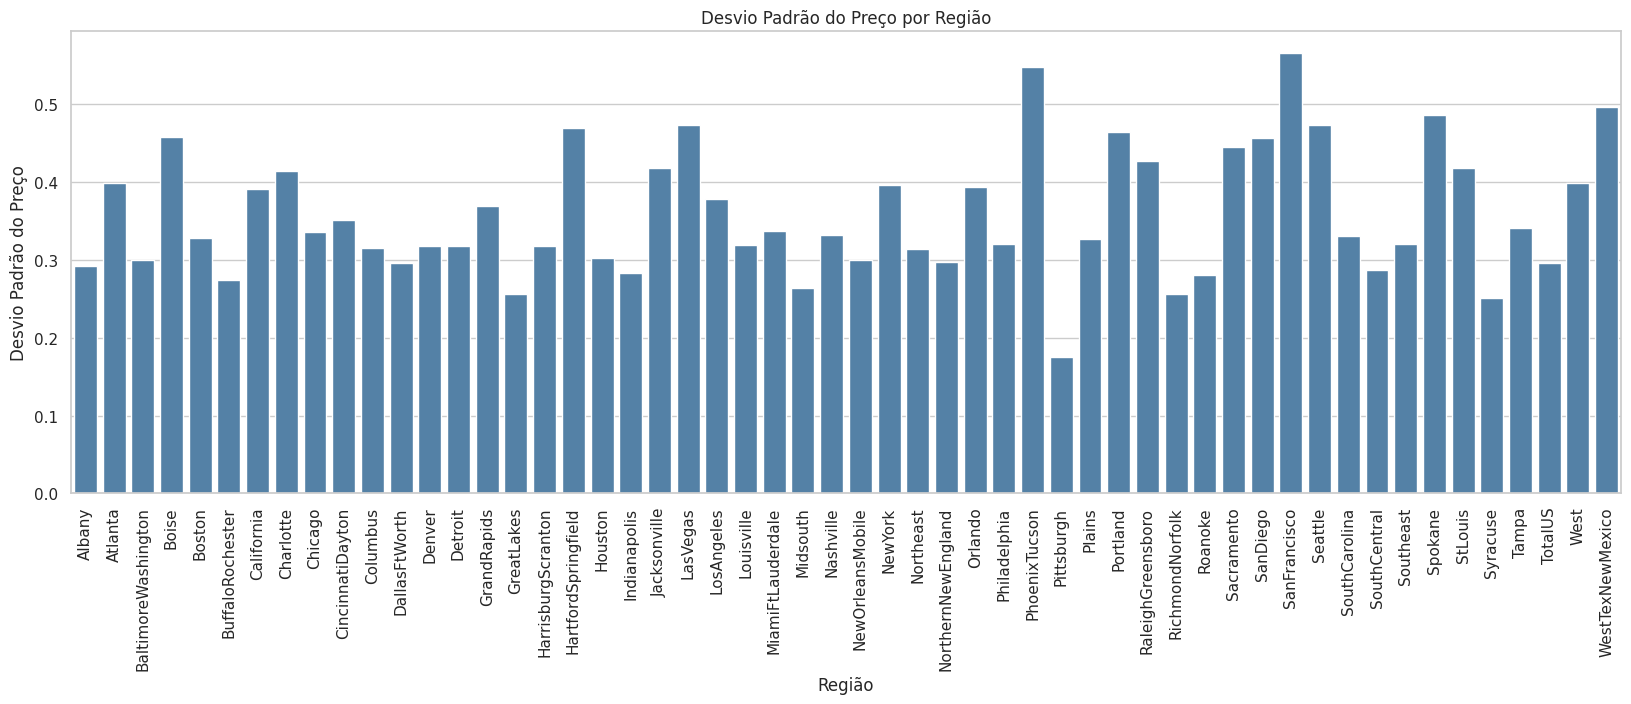

In [159]:
# Calcular desvio padrão do preço por região
std_df = df.groupby('region')['AveragePrice'].std().reset_index()
std_df.rename(columns={'AveragePrice': 'std_price'}, inplace=True)

# Plotar o desvio padrão por região
plt.figure(figsize=(20,6))
sns.barplot(x='region', y='std_price', data=std_df, color='steelblue')
plt.xticks(rotation=90)
plt.title('Desvio Padrão do Preço por Região')
plt.ylabel('Desvio Padrão do Preço')
plt.xlabel('Região')
plt.show()

**Média por Região**

Faremos o mesmo com a média por região.

/tmp/ipython-input-160-2004134932.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='mean_price', data=plot_df, palette=colors)


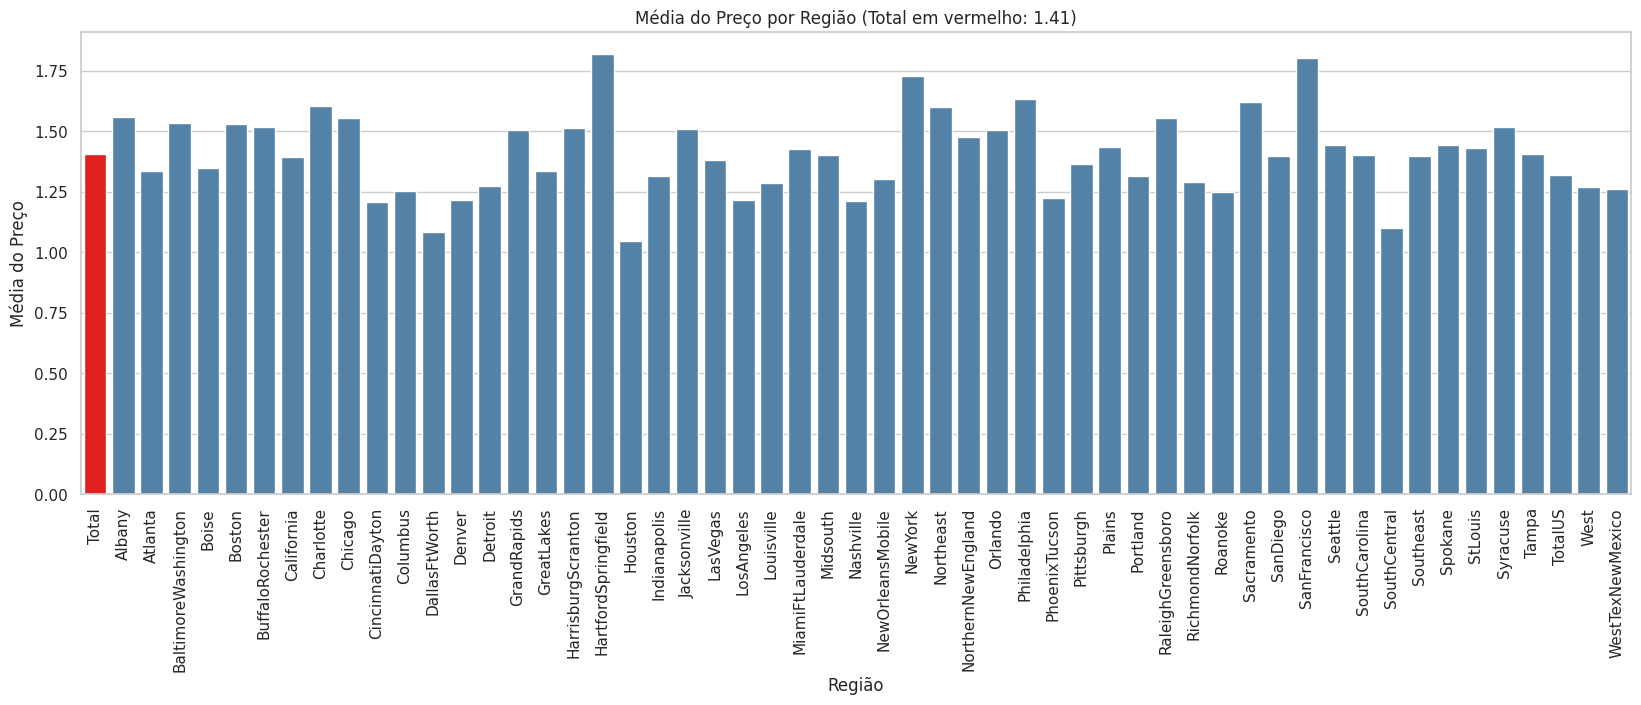

In [160]:
# Calcular média por região
mean_df = df.groupby('region')['AveragePrice'].mean().reset_index()
mean_df.rename(columns={'AveragePrice': 'mean_price'}, inplace=True)

# Calcular média geral
mean_total = df['AveragePrice'].mean()

# Criar linha total combinada
total_row = pd.DataFrame({'region': ['Total'], 'mean_price': [mean_total]})

plot_df = pd.concat([total_row, mean_df], ignore_index=True)

# Plotar gráfico com médi geral por região e média geral
plt.figure(figsize=(20,6))

# Primeira barra (Total) vermelha, o resto azul
colors = ['red'] + ['steelblue'] * (len(plot_df) - 1)

sns.barplot(x='region', y='mean_price', data=plot_df, palette=colors)

plt.xticks(rotation=90)
plt.title(f'Média do Preço por Região (Total em vermelho: {mean_total:.2f})')
plt.ylabel('Média do Preço')
plt.xlabel('Região')

plt.show()

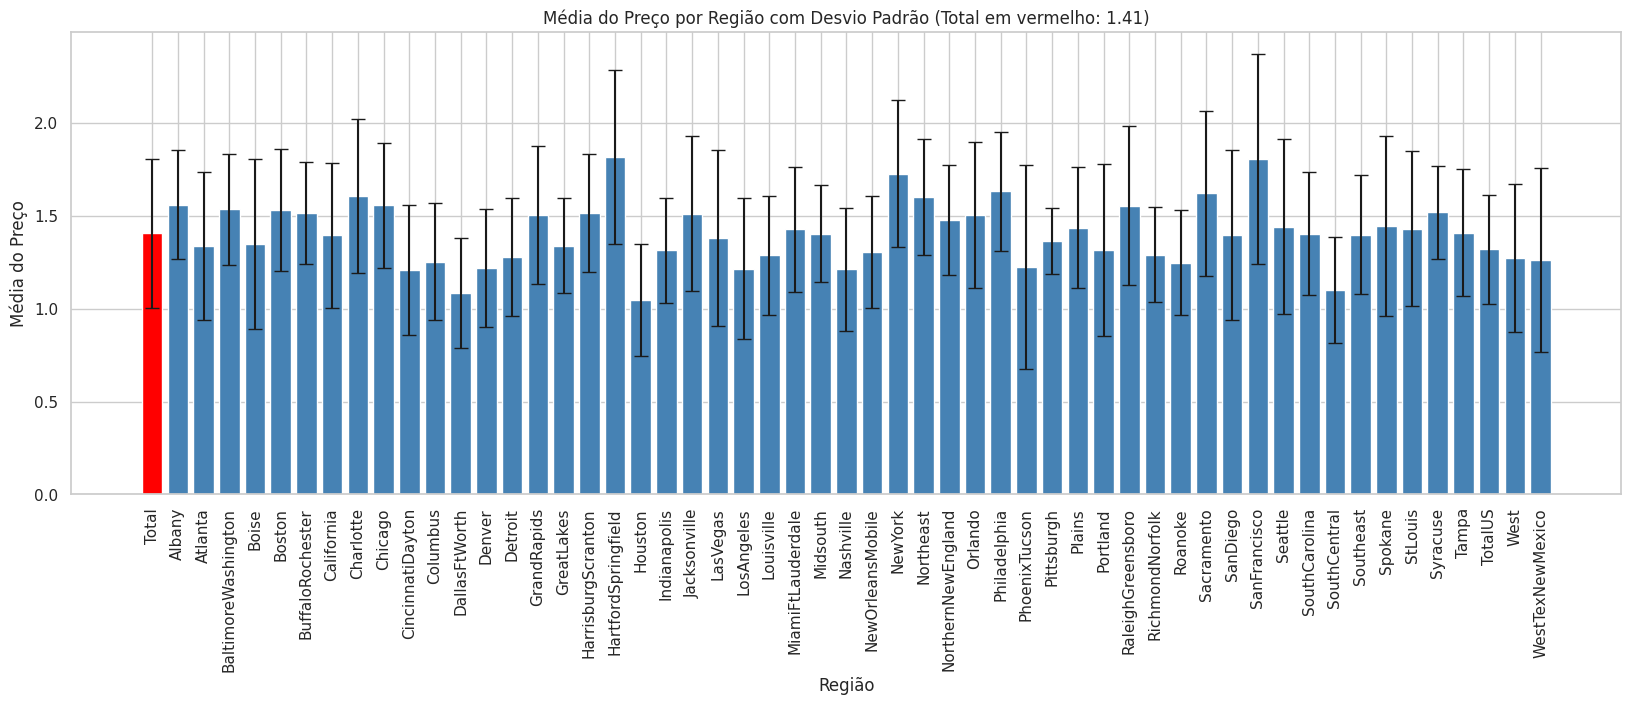

In [161]:
# Calcular desvio padrão e média por região
stats_df = df.groupby('region')['AveragePrice'].agg(std_price='std', mean_price='mean').reset_index()

# Calcular desvio padrão e média gerais
std_total = df['AveragePrice'].std()
mean_total = df['AveragePrice'].mean()

# Criar linha do total
total_row = pd.DataFrame({'region': ['Total'], 'std_price': [std_total], 'mean_price': [mean_total]})

# Concatenar
plot_df = pd.concat([total_row, stats_df], ignore_index=True)

# Cores: primeira barra vermelha, o resto azul
colors = ['red'] + ['steelblue'] * (len(plot_df)-1)

# Plotar com matplotlib
plt.figure(figsize=(20,6))
plt.bar(
    plot_df['region'],
    plot_df['mean_price'],
    yerr=plot_df['std_price'],
    color=colors,
    capsize=5
)
plt.xticks(rotation=90)
plt.title(f'Média do Preço por Região com Desvio Padrão (Total em vermelho: {mean_total:.2f})')
plt.ylabel('Média do Preço')
plt.xlabel('Região')
plt.show()

**Mercados Premium & variação de preço**

Como já observado, os mercados de alto padrão em SanFrancisco e NewYork também tem os maiores desvios padrões, o que revela possíveis impactos de sazonalidade e/ou variação de preços por oferta e demanda.

**Legibilidade**

A fim de facilitar a leitura, plotamos um gráfico ordenado por média mais alta.

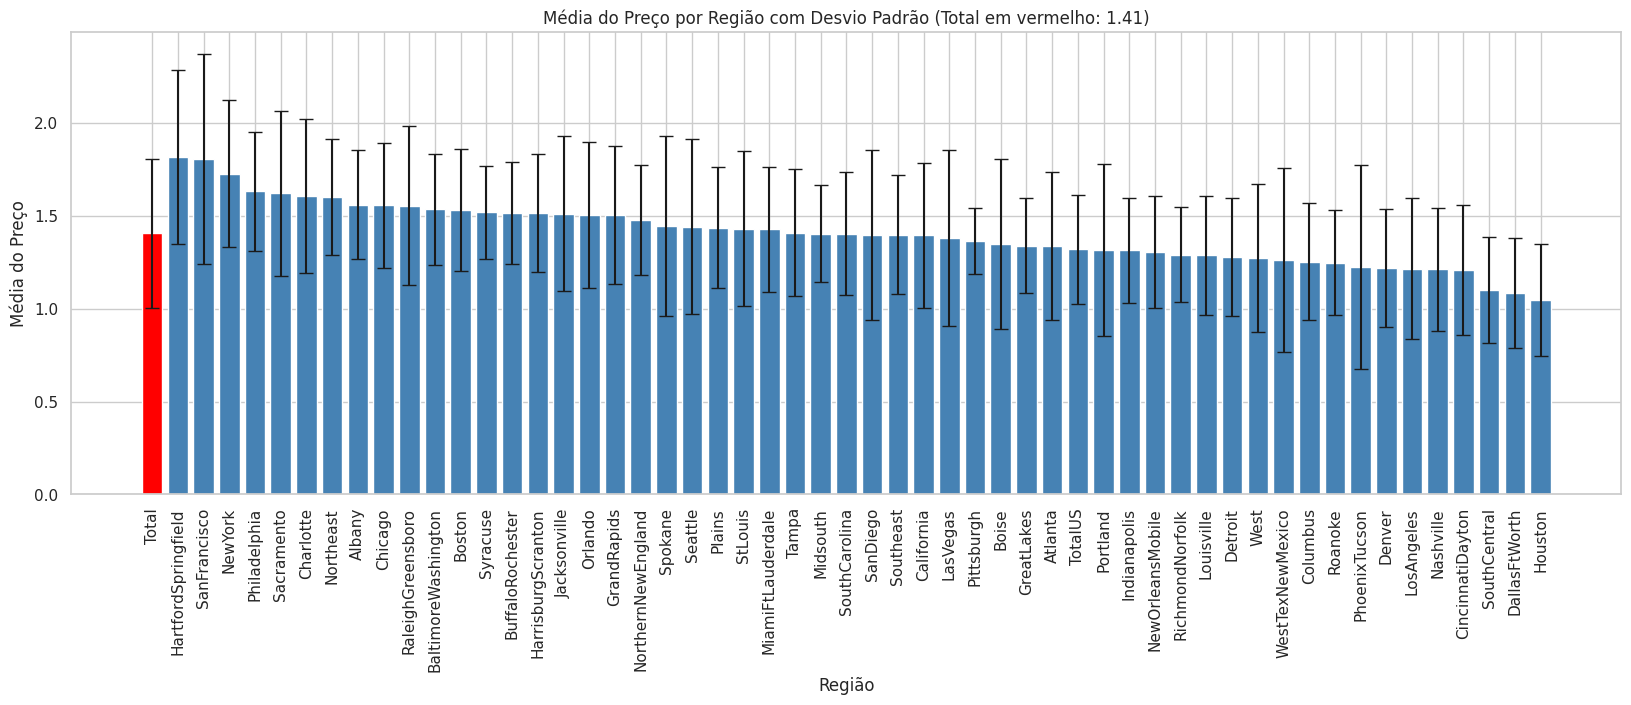

In [162]:
# Calcular desvio padrão e média por região
stats_df = df.groupby('region')['AveragePrice'].agg(std_price='std', mean_price='mean').reset_index()

# Calcular desvio padrão e média gerais
std_total = df['AveragePrice'].std()
mean_total = df['AveragePrice'].mean()

# Criar linha do total
total_row = pd.DataFrame({'region': ['Total'], 'std_price': [std_total], 'mean_price': [mean_total]})

# Concatenar
plot_df = pd.concat([total_row, stats_df], ignore_index=True)

# Ordenar pelo maior preço médio (exceto o Total, que manteremos no topo)
plot_df_no_total = plot_df[plot_df['region'] != 'Total'].sort_values(by='mean_price', ascending=False)
plot_df_final = pd.concat([plot_df[plot_df['region'] == 'Total'], plot_df_no_total])

# Cores: primeira barra vermelha (Total), o resto azul
colors = ['red'] + ['steelblue'] * (len(plot_df_final)-1)

# Plotar com matplotlib
plt.figure(figsize=(20,6))
plt.bar(
    plot_df_final['region'],
    plot_df_final['mean_price'],
    yerr=plot_df_final['std_price'],
    color=colors,
    capsize=5
)
plt.xticks(rotation=90)
plt.title(f'Média do Preço por Região com Desvio Padrão (Total em vermelho: {mean_total:.2f})')
plt.ylabel('Média do Preço')
plt.xlabel('Região')
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Hisograma de Preço Médio Por Tipo*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

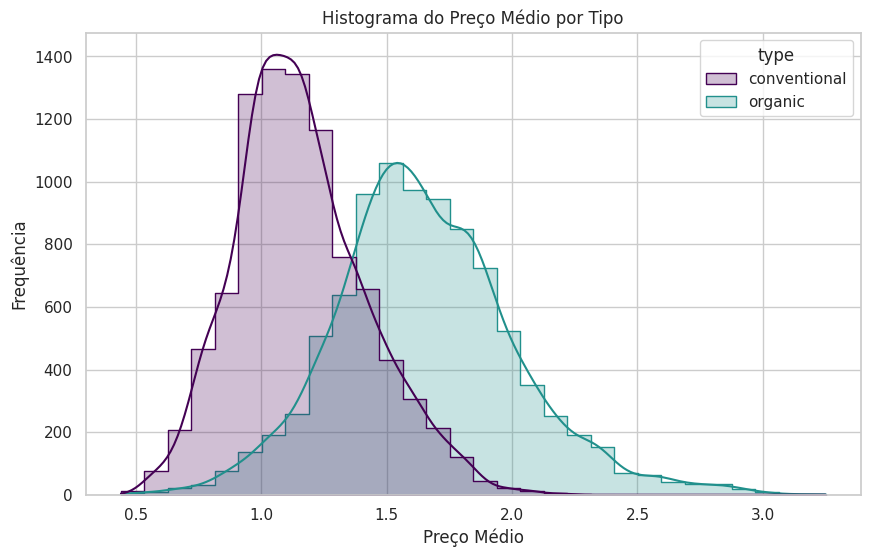

In [163]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='AveragePrice', bins=30, hue='type', kde=True, element='step', palette=['#440154', '#21908C'])
plt.title('Histograma do Preço Médio por Tipo')
plt.xlabel('Preço Médio')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do preço médio por tipo de abacate no dataset. O eixo Y representa a frequência, ou seja, o número de registros (linhas no dataset) que possuem preço médio dentro de cada faixa (bin).

Os preços dos abacates convencionais se concentram na faixa de 1.0 a 1.3, enquanto os preços dos orgânicos predominam em faixas mais altas, geralmente entre 1.3 e 2.0. Isso reforça que os abacates orgânicos têm preços médios mais altos e maior dispersão, como evidenciado pela cauda da distribuição.

### *Heat Map*

Para observar o preço ao longo do tempo, um mapa de calor pode ser mais objetivo porque o tempo não tem 'bins' naturais.

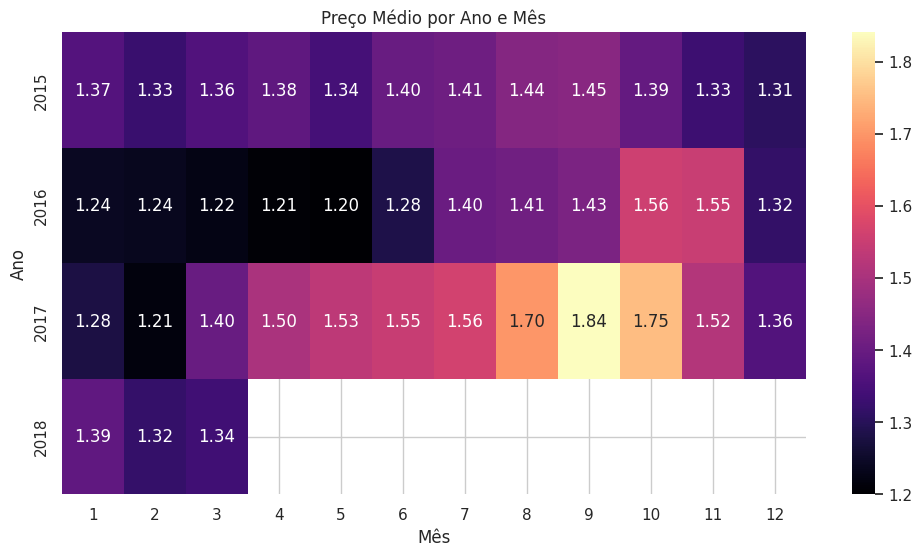

In [164]:
# Heatmap de média de preço por ano e mês
# Primeiro criamos as colunas Year e Month a partir da coluna Date, caso ainda não existam
# Isso permitirá agrupar os dados para criar o mapa de calor
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Agrupamos os dados por ano e mês, calculando o preço médio
pivot = df.groupby(['Year', 'Month'])['AveragePrice'].mean().unstack()

# Plotamos o heatmap com anotação dos valores e a paleta magma para bom contraste
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='magma')
plt.title('Preço Médio por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

**Sazonalidade**

A tendência indica que há uma alta nos preços no fim do verão e começo do outono nos EUA — possivelmente associada a menor oferta por questões sazonais de colheita ou aumento da demanda. Além de preços mais baixos no começo no ano. Os altos preços em 2017 mostram que o fator que causou a subida expressiva perdurou. Em uma comparação simples entre o primeiro trimestre de 2017 com o de 2018, pode-se explorar associações de dados para prever um aumento maior em 2018?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

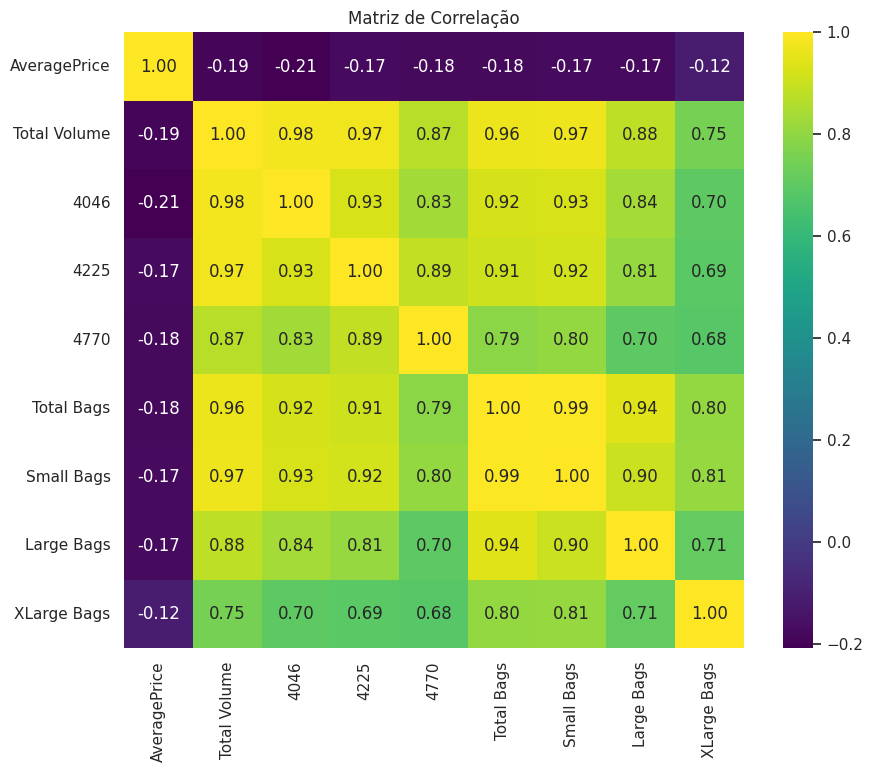

In [165]:
## Matriz de correlação
num_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre 4046, 4225, total bags width e small bags com Total Volume. Há ainda uma correlação fraca e negativa com Total Volume e as vendas, expressando a lei da oferta e da procura.

Small Bags e Large Bags têm alta correlação com Total Bags, assim como os tipos de avocados, pois são suas partes, enquanto XLarge Bags e Large Bags tem menos correlação pois, provavelmente, contribuem menos para o total.

## Tratamento de Valores Nulos

O dataset avocados.csv não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [166]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset avocados.csv:")
df.isnull().sum()

Valores nulos no dataset avocados.csv:


,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [167]:
# Criar features (X) e target (y)
X = df[['Total Volume', '4046', '4225', '4770',
        'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
        'type', 'region']]

y = df['AveragePrice']

# One-hot enconding para type e region, pois são categóricos
X_encoded = pd.get_dummies(X, columns=['type', 'region'], drop_first=True)
X_encoded = X_encoded.astype(int)


#resultado
print(X_encoded.head())
print(X_encoded.shape)

   Total Volume  4046    4225  4770  Total Bags  Small Bags  Large Bags  \
0         64236  1036   54454    48        8696        8603          93   
1         54876   674   44638    58        9505        9408          97   
2        118220   794  109149   130        8145        8042         103   
3         78992  1132   71976    72        5811        5677         133   
4         51039   941   43838    75        6183        5986         197   

   XLarge Bags  type_organic  region_Atlanta  ...  region_SouthCarolina  \
0            0             0               0  ...                     0   
1            0             0               0  ...                     0   
2            0             0               0  ...                     0   
3            0             0               0  ...                     0   
4            0             0               0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0

In [168]:
# Dividir os dados em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

In [169]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (10949, 62)
Dimensões de X_test: (7300, 62)
Dimensões de y_train: (10949,)
Dimensões de y_test: (7300,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [170]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [171]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

# Mostrar as formas para confirmar
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")

X_train_normalized shape: (10949, 62)
X_test_normalized shape: (7300, 62)


In [172]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [173]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.004742  0.004359  0.003487  0.001524    0.006043    0.008251   
1      0.004556  0.008103  0.001039  0.000390    0.004569    0.004994   
2      0.003036  0.002786  0.002373  0.000074    0.003847    0.005305   
3      0.000975  0.000602  0.001861  0.000012    0.000159    0.000000   
4      0.000048  0.000009  0.000010  0.000000    0.000160    0.000225   

   Large Bags  XLarge Bags  type_organic  region_Atlanta  ...  \
0    0.000661     0.000000           0.0             0.0  ...   
1    0.003482     0.001968           0.0             0.0  ...   
2    0.000288     0.000000           0.0             0.0  ...   
3    0.000581     0.000000           1.0             0.0  ...   
4    0.000000     0.000000           1.0             0.0  ...   

   region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                   0.0                  0.0       

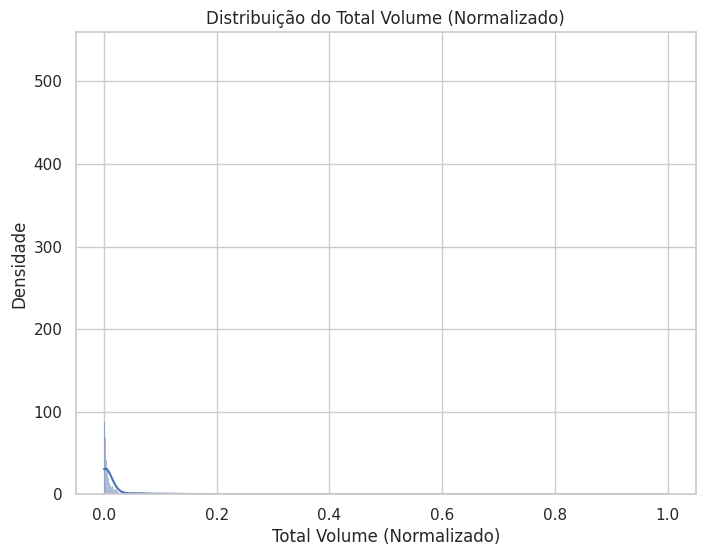

In [174]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Total Volume'], kde=True, stat='density')
plt.title('Distribuição do Total Volume (Normalizado)')
plt.xlabel('Total Volume (Normalizado)')
plt.ylabel('Densidade')
plt.show()

O histograma de *Total Volume* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original. O gráfico me parece na escala errada e será necessário fazer a tranformação logaritimica nos dados antes da normalização -- uma opção diferente do modelo apresentado como referência.

### Transformação logarítimica nos dados originais

Aplicaremos a transformação logarítimica nos dados e seguiremos com a normalização, como nom modelo anterior.

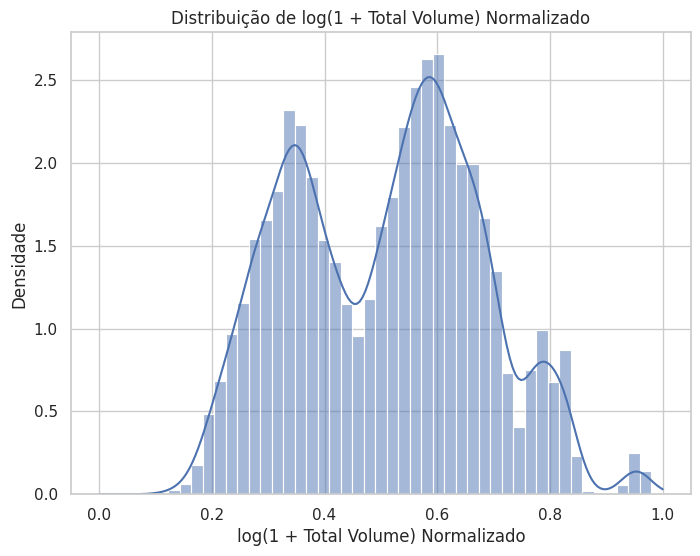

In [175]:
# Aplicar log1p nos dados originais
df['Total Volume log'] = np.log1p(df['Total Volume'])

# Então normalize
scaler = MinMaxScaler()
df['Total Volume log norm'] = scaler.fit_transform(df[['Total Volume log']])

# Visualizar
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Volume log norm'], kde=True, stat='density')
plt.title('Distribuição de log(1 + Total Volume) Normalizado')
plt.xlabel('log(1 + Total Volume) Normalizado')
plt.ylabel('Densidade')
plt.show()

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [176]:
# Criar uma nova coluna log(1 + Total Volume)
X_train['Total Volume log'] = np.log1p(X_train['Total Volume'])
X_test['Total Volume log'] = np.log1p(X_test['Total Volume'])

In [177]:
# Inicializar o scaler
scaler_std = StandardScaler()

In [178]:
# Ajustar apenas com X_train['Total Volume log']
scaler_std.fit(X_train[['Total Volume log']])

StandardScaler()

In [179]:
# Transformar
X_train_log_std = scaler_std.transform(X_train[['Total Volume log']])
X_test_log_std = scaler_std.transform(X_test[['Total Volume log']])


In [180]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_log_std, columns=['Total Volume log (std)'])

In [181]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   Total Volume log (std)
0                0.473316
1                0.455995
2                0.279718
3               -0.212360
4               -1.463304


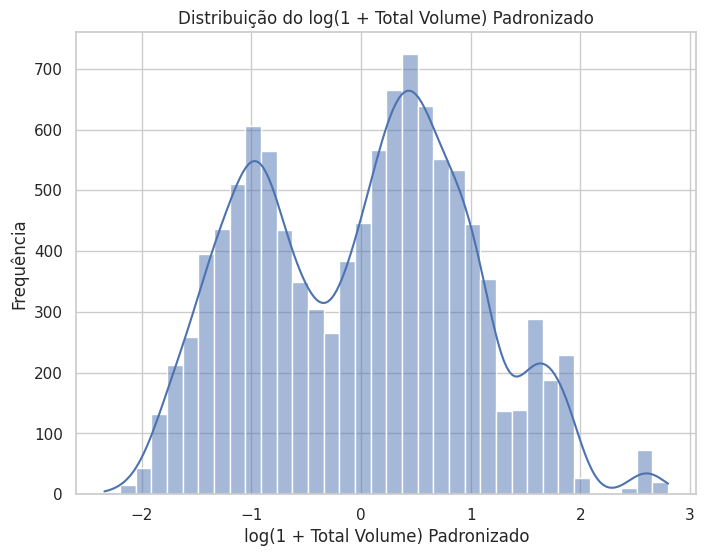

In [182]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8,6))
sns.histplot(X_train_log_std.flatten(), kde=True)
plt.title('Distribuição do log(1 + Total Volume) Padronizado')
plt.xlabel('log(1 + Total Volume) Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *Distribuição do Log* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero. No entando, ainda há três grandes variações com picos nos gráficos. Isso indica que mesmo após a transformação logarítmica e padronização, os dados mantêm alguma estrutura interna — possivelmente relacionada a sazonalidade, região ou tipo de abacate.

# Conclusão

A análise exploratória dos dados de vendas de abacate tipo Hass nos Estados Unidos permitiu confirmar padrões importantes do mercado:


*   Sazonalidade no preço: O heatmap e o gráfico temporal evidenciaram variações claras nos preços ao longo do ano, com picos de preço no final do verão e início do outono, e preços mais baixos no início do ano. Isso indica uma forte influência da sazonalidade no preço do abacate.

*   Diferença de preço entre tipos: Os boxplots e histogramas mostraram que os abacates orgânicos apresentam preços médios mais altos e maior dispersão em comparação com os convencionais. Isso reflete a disposição do consumidor em pagar mais por produtos com apelo de saudabilidade e menor impacto ambiental.

* Variação regional: Os gráficos de barras e boxplots por região confirmaram diferenças marcantes entre mercados. Regiões como San Francisco e New York apresentaram os maiores preços e maior variação, enquanto regiões como Houston e DallasFtWorth mostraram preços mais baixos e mais estáveis.

Além disso, a transformação logarítmica e padronização de Total Volume indicaram que, mesmo após os ajustes, os dados mantêm características multimodais — reforçando a hipótese de que variáveis como região e período impactam diretamente os volumes vendidos.

As três hipóteses levantadas foram validadas:

1.   O preço médio do abacate tipo Hass varia ao longo do ano, apresentando sazonalidade?

Sim. Os gráficos temporais e heatmaps confirmaram sazonalidade clara, com períodos do ano em que os preços são consistentemente mais altos.

⸻

2. Abacates orgânicos são mais caros do que os convencionais?

Sim. Os boxplots, histogramas e gráficos de barras mostraram que o preço médio dos orgânicos é superior ao dos convencionais, com maior dispersão e presença de valores altos. Revela um comportamento imprevisto do consumidor: a disposição de compra por abacates orgânicos.

⸻

3. Os preços médios variam por região?

Sim. A análise por região evidenciou variações significativas de preços e de desvio padrão, com destaque para mercados premium como San Francisco e New York.

⸻

Próximo passo sugerido

Dada a confirmação das hipóteses, um próximo passo seria:
* Desenvolver modelos de regressão para prever preços médios considerando tipo, região e época do ano.
* Explorar agrupamento (clustering) para identificar perfis de mercados.